# Project 3: Skiing vs Snowboarding
## Data Cleaning

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
ski = pd.read_csv('../Data/skiing.csv')
board = pd.read_csv('../Data/snowboarding.csv')

### Skiing Data

In [3]:
ski.head() # Looking at the data frame

,title,text,subreddit,created,author,is_self,timestamp,class
0,First set of skis.,So I am thinking about getting my first skis (...,skiing,1579818807,D3470,True,2020-01-23,1
1,Eastern Pennsylvania Skiing,Looking for any advice at all. Or buddies! Goi...,skiing,1579822807,potatoes6,True,2020-01-23,1
2,"OK Marksman, Bentchetler 100 for a solid daily...",Thanks for the help y’all!,skiing,1579823764,mrrichmahogany,True,2020-01-23,1
3,Hank Bilous Massive Transfer &amp; Full Run | ...,[https://www.newschoolers.com/videos/watch/951...,skiing,1579824890,jurassisaurus,True,2020-01-23,1
4,Niseko Danger,Just trying to get a general feel for how dang...,skiing,1579827729,IndoorSurvivalist,True,2020-01-23,1


In [4]:
# Checking for null values
ski.isnull().sum()

title        0
text         0
subreddit    0
created      0
author       0
is_self      0
timestamp    0
class        0
dtype: int64

#### Null Values:
There are no null values in the skiing data frame.

In [5]:
# Checking for duplicate posts
ski.drop_duplicates(subset = ['title', 'text', 'author']).shape == ski.shape

True

#### Duplicates:
There are no duplicate posts in the skiing data frame.

In [6]:
# Removing numeric text, as these likely have no meaning for our use case
ski['text'] = ski['text'].map(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [7]:
# I noticed the escape character \n in some of the documents, so I will remove these
ski['text'] = ski['text'].map(lambda x: x.replace('\n', ''))

In [8]:
# Removing documents with urls, as these likely have no meaning for our use case
# ski = ski.loc[(~ski['text'].str.contains('www')) & (~ski['text'].str.contains('com'))]

In [9]:
# There is a common bot on reddit called 'AutoModerator', so I will check for these
ski.loc[ski['author'] == 'AutoModerator'].head()

,title,text,subreddit,created,author,is_self,timestamp,class
15,"[Jan 24, 2020] Weekly Discussion: Ask your gea...",Please ask any ski-related questions here. It'...,skiing,1579845980,AutoModerator,True,2020-01-24,1
350,"[Jan 17, 2020] Weekly Discussion: Ask your gea...",Please ask any ski-related questions here. It'...,skiing,1579241158,AutoModerator,True,2020-01-17,1
448,"[Jan 10, 2020] Weekly Discussion: Ask your gea...",Please ask any ski-related questions here. It'...,skiing,1578636371,AutoModerator,True,2020-01-10,1
823,"[Jan 03, 2020] Weekly Discussion: Ask your gea...",Please ask any ski-related questions here. It'...,skiing,1578031531,AutoModerator,True,2020-01-03,1
904,"[Dec 27, 2019] Weekly Discussion: Ask your gea...",Please ask any ski-related questions here. It'...,skiing,1577426746,AutoModerator,True,2019-12-27,1


In [10]:
ski = ski.loc[ski['author'] != 'AutoModerator'] # Deleting documents creates by AutoModerator

#### Combining Title and Text:
Titles could add useful information to the model. I will create a new column with both title and text, and test it with models to see how it performs against just the selftext.

In [11]:
# Creating a new column combining the title and text of the posts
ski['title_text'] = ski['title'] + ski['text']

In [12]:
ski.shape # Checking the final shape

(3797, 9)

### Snowboarding Data

In [13]:
board.head() # Looking at the data frame

,title,text,subreddit,created,author,is_self,timestamp,class
0,"Buying a board, need opinions on size.","I want to get back into snowboarding, havent d...",snowboarding,1579830441,tfr737,True,2020-01-23,0
1,Beginner advice!,"So a little context, I used to ski, went ridin...",snowboarding,1579830507,Mcapp-1,True,2020-01-23,0
2,Burton snowboarding jacket sizing for a small guy,"I am no big guy by American standards: 5'6"", a...",snowboarding,1579835749,bmw-fanboy,True,2020-01-23,0
3,"New Snowboarder here, what’s the deal with the...",So my wife and I are just getting into snowboa...,snowboarding,1579836431,GoingDigitl,True,2020-01-23,0
4,Do FORUM Boards have any value???,like is it worth keeping one?,snowboarding,1579849635,Contentclicker,True,2020-01-24,0


In [14]:
board.isnull().sum() # Checking for null values

title        0
text         0
subreddit    0
created      0
author       0
is_self      0
timestamp    0
class        0
dtype: int64

#### Null Values:
There are no null values in the snowboarding data frame.

In [15]:
# Checking for duplicate posts
board.drop_duplicates(subset = ['title', 'text']).shape == board.shape

True

#### Duplicates:
There are no duplicates in the snowboarding data frame.

In [16]:
# Removing numeric text
board['text'] = board['text'].map(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [17]:
# Removing '\n's
board['text'] = board['text'].map(lambda x: x.replace('\n', ''))

In [18]:
# Removing documents with urls
# board = board.loc[(~board['text'].str.contains('www')) & (~board['text'].str.contains('com'))]

In [19]:
# Checking for AutoModerator
board.loc[board['author'] == 'AutoModerator'].head()

,title,text,subreddit,created,author,is_self,timestamp,class
6,Daily Discussion: /r/Snowboarding General Disc...,"Want to discuss current trends? Board shapes, ...",snowboarding,1579854779,AutoModerator,True,2020-01-24,0
7,Weekly /r/Snowboarding Gear/Quiver Thread -- J...,OK you know you want to show off that stunt st...,snowboarding,1579854787,AutoModerator,True,2020-01-24,0
29,Daily Discussion: /r/Snowboarding General Disc...,"Want to discuss current trends? Board shapes, ...",snowboarding,1579941182,AutoModerator,True,2020-01-25,0
43,Daily Discussion: /r/Snowboarding General Disc...,"Want to discuss current trends? Board shapes, ...",snowboarding,1580027570,AutoModerator,True,2020-01-26,0
44,Weekly /r/Snowboarding Non-Snowboarding Pictur...,This is the place for all of those pictures th...,snowboarding,1580027578,AutoModerator,True,2020-01-26,0


In [20]:
board = board.loc[board['author'] != 'AutoModerator'] # Deleting documents creates by AutoModerator

#### Combining Title and Text:
I will do the same as I did for the skiing data frame.

In [21]:
# Creating a new column combining the title and text of the posts
board['title_text'] = board['title'] + board['text']

In [22]:
board.shape # Checking the final shape

(3496, 9)

### Combined Data Frame

In [23]:
# Combining the two data frames for modeling
ski_board = pd.concat([ski, board])

In [24]:
ski_board.shape # Checking the shape

(7293, 9)

### Export

In [25]:
# Exporting final data frame to csv for modeling
# ski_board.to_csv('../Data/ski_board.csv', index=False)

## EDA
### Skiing Data

In [26]:
# Defining our features to visualize word frequency
X = ski['title_text']

In [27]:
# Instantiating CountVectorizer
cvec = CountVectorizer(max_features=500, stop_words='english')

In [28]:
# Vectorizing features
X_cvec = cvec.fit_transform(X);

In [29]:
# Turning our vectorized features into a data frame
df_ski = pd.DataFrame(X_cvec.toarray(), columns = cvec.get_feature_names())

In [30]:
df_ski.head()

,able,actually,add,advance,advanced,advice,aggressive,ago,air,alpine,...,work,working,worried,worth,wrong,www,xb,year,years,youtube
0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


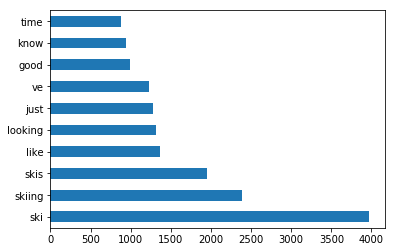

In [31]:
# Creating a bar chart with the most frequent words
df_ski.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')

#### Note:
Unsurprisingly, 'skis', 'skiing', and 'ski' were the most popular words. These, however, must be removed because we want to show that there is a difference between skiing and snowboarding aside from the words themselves. If we keep these words in, it will be way too easy and defeat the purpose of the classification. I suspect we will find the same for snowboarding. I will add these words to a modified list of stop words.

In [32]:
# Defining custom stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
my_stop_words = ENGLISH_STOP_WORDS.union({
    'ski',
    'skiing',
    'skis',
    'snowboarding',
    'snowboard',
    'board',
    'skier',
    'skied',
    'skiers',
    'snowboards',
    'boards',
    'boarding'
})

### Snowboarding Data

In [33]:
# Going through the same process as I did for skiing above
X = board['title_text']

In [34]:
cvec = CountVectorizer(max_features=500, stop_words='english')

In [35]:
X_cvec = cvec.fit_transform(X)

In [36]:
df_board = pd.DataFrame(X_cvec.toarray(), columns = cvec.get_feature_names())

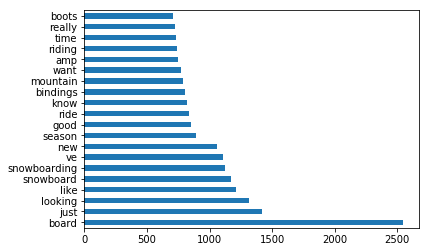

In [37]:
df_board.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')

As suspected, 'snowboarding', 'board', and 'snowboard' are very popular. I added these to my modified list of stop words.

## Toy Models
I will run a couple simple models to see how they perform, test different features, and explore what features are important.

In [38]:
# Defining our feature vectors and prediction vector
X = ski_board['text']
y = ski_board['class']

In [39]:
# Baseline accuracy
y.value_counts(normalize=True)*100

1    52.063623
0    47.936377
Name: class, dtype: float64

In [40]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [41]:
# Vectorizing our features
cvec = CountVectorizer(max_features=500, stop_words=my_stop_words)
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [42]:
# Creating a data frame of the word frequency
df_features = pd.DataFrame(X_train_cvec.toarray(), columns = cvec.get_feature_names())

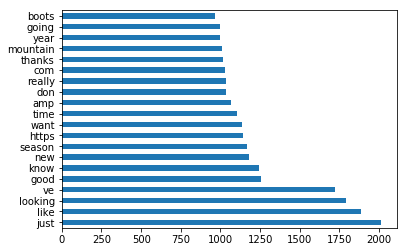

In [43]:
# Graphing the words with the highest word frequency
df_features.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')

### Decision Trees

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier(random_state=42)

In [46]:
dt.fit(X_train_cvec, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [47]:
print(f'Score on training set: {dt.score(X_train_cvec, y_train)}')
print(f'Score on testing set: {dt.score(X_test_cvec, y_test)}')

Score on training set: 0.9921375022856098
Score on testing set: 0.6326754385964912


#### Note on Decision Trees:
As we could have expected, our decision tree model was highly overfit. 

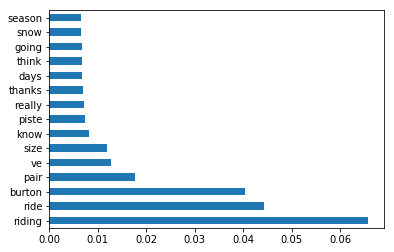

In [48]:
# Sorting our most important features to get an idea of what is driving the decision tree model
pd.Series(data=dt.feature_importances_,
          index=cvec.get_feature_names()).sort_values(ascending=False).head(15).plot(kind='barh');

#### Note on Feature Importance:
The first four words are expected. "Riding" and "ride" are common snowboarding terms, and "Burton" is one of the top brands for snowboarding. "Pair" makes sense because it is likely used more in skiing since you refer to a pair of skis or ski poles. Some of the other words, like 'really," are not intuitive. I also discovered some more words that should be removed such as 'skier' and 'skied.' I will add these to my list of stop words above.

In [49]:
# from sklearn.tree import export_graphviz
# export_graphviz(dt,
#                out_file="./test.dot",
#                feature_names=cvec.get_feature_names(),
#                class_names=['skiing','snowboarding'],
#                rounded=True,
#                filled=True)

#### Stop Words:
I will try to fit a model using the english stop words. This will leave in words like "skiing" and "snowboarding." I suspect our model will perform much better.

In [50]:
cvec = CountVectorizer(max_features=500, stop_words='english')
X_train_cvec_2 = cvec.fit_transform(X_train)
X_test_cvec_2 = cvec.transform(X_test)

In [51]:
dt_2 = DecisionTreeClassifier(random_state=42)

In [52]:
dt_2.fit(X_train_cvec_2, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [53]:
print(f'Score on training set: {dt_2.score(X_train_cvec_2, y_train)}')
print(f'Score on testing set: {dt_2.score(X_test_cvec_2, y_test)}')

Score on training set: 0.9932345949899433
Score on testing set: 0.7883771929824561


#### Note on Stop Words:
As expected, the better score was acheived with only the english stop words. When I added back in my custom stop words, the accuracy rose by about 15 percent. Unfortunately, we have to remove words like "ski" and "snowboard" because the purpose of doing this classification is to determine if there is a difference between skiers and snowboarding aside from the words themselves. It is clear from the large rise in accuracy when adding them in that these words are driving the model.

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression(random_state=42)

In [56]:
lr.fit(X_train_cvec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
print(f'Score on training set: {lr.score(X_train_cvec, y_train)}')
print(f'Score on testing set: {lr.score(X_test_cvec, y_test)}')

Score on training set: 0.7544340830133479
Score on testing set: 0.6968201754385965


#### Note on Logistic Regression Model:
The logistic regression model had a higher bias, but a much lower variance. It still did not perform much above baseline, so I am beginning to think the subreddits may not be that separable.

### Stemming and Lemmatizing
I will run a few simple models to see if stemming or lemmatizing the text improves performance.

#### Stemming

In [58]:
# Stemming the text
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
ski_board['text'] = ski_board['text'].map(lambda x: ' '.join([stemmer.stem(word) for word in x.split(' ')]))

In [59]:
# Defining our feature vectors and prediction vector and doing a train test split
X = ski_board['text']
y = ski_board['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [60]:
# Vectorizing the features
cvec = CountVectorizer(max_features=500, stop_words=my_stop_words)
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

#### Decision Tree with Stemming

In [61]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_cvec, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
print(f'Score on training set: {dt.score(X_train_cvec, y_train)}')
print(f'Score on testing set: {dt.score(X_test_cvec, y_test)}')

Score on training set: 0.9930517462058878
Score on testing set: 0.6140350877192983


#### Logistic Regression with Stemming

In [63]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_cvec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
print(f'Score on training set: {lr.score(X_train_cvec, y_train)}')
print(f'Score on testing set: {lr.score(X_test_cvec, y_test)}')

Score on training set: 0.751325653684403
Score on testing set: 0.6902412280701754


#### Lemmatizing

In [65]:
# Lemmatizing the text
from nltk.stem import WordNetLemmatizer
lemmer = WordNetLemmatizer()
ski_board['text'] = ski_board['text'].map(lambda x: ' '.join([lemmer.lemmatize(word) for word in x.split(' ')]))

In [66]:
# Defining our feature vectors and prediction vector and doing a train test split
X = ski_board['text']
y = ski_board['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [67]:
# Vectorizing the features
cvec = CountVectorizer(max_features=500, stop_words=my_stop_words)
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

#### Decision Tree with Lemmatizing

In [68]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_cvec, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [69]:
print(f'Score on training set: {dt.score(X_train_cvec, y_train)}')
print(f'Score on testing set: {dt.score(X_test_cvec, y_test)}')

Score on training set: 0.9930517462058878
Score on testing set: 0.6069078947368421


#### Logistic Regression with Lemmatizing

In [70]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_cvec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
print(f'Score on training set: {lr.score(X_train_cvec, y_train)}')
print(f'Score on testing set: {lr.score(X_test_cvec, y_test)}')

Score on training set: 0.748217224355458
Score on testing set: 0.6825657894736842


#### Note on Stemming and Lemmatizing:
Stemming and lemmatizing the text hardly change the model's performance. If anything, it made it slightly less accurate. I will likely not stem or lemmatize the text.